In [12]:
import os
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt

base_path = os.path.dirname(os.getcwd())
sys.path.insert(0, base_path)

In [13]:
def calculate_silence_percentage(call_data: list) -> tuple:

    total_call_duration = call_data[-1]['etime'] - call_data[0]['stime']
    
    # Merge overlapping speaking intervals
    merged_intervals = []
    
    for entry in call_data:
        if not merged_intervals or entry['stime'] > merged_intervals[-1][1]:
            merged_intervals.append([entry['stime'], entry['etime']])
        else:
            merged_intervals[-1][1] = max(merged_intervals[-1][1], entry['etime'])
    
    # Calculate total speaking time
    total_speaking_time = sum(end - start for start, end in merged_intervals)
    
    # Compute silence duration and percentage
    silence_duration = total_call_duration - total_speaking_time
    silence_percentage = (silence_duration / total_call_duration) * 100
    
    return round(silence_percentage, 2), silence_duration

In [ ]:
def visualize_summary(silence_percentage: list, silence_duration: list, number_of_calls: int) -> None:
        average_silence_percentage = sum(silence_percentage) / number_of_calls
        average_silence_duration = sum(silence_duration) / number_of_calls

        data = {
        "Metric": ["Avg Silence Percentage", "Avg Silence Duration"],
        "Value": [average_silence_percentage, average_silence_duration]
        }
        
        df = pd.DataFrame(data)
        
        plt.figure(figsize=(6, 5))
        bars = plt.bar(df["Metric"], df["Value"], color=['blue', 'green'], width=0.6)
        plt.xlabel("Silence Metrics")
        plt.ylabel("Value")
        plt.title("Comparison of Silence Percentage and Duration")
        plt.ylim(0, max(average_silence_percentage, average_silence_duration) * 1.2)

        for i, bar in enumerate(bars):
            label = f'{bar.get_height():.2f} %' if i == 0 else f'{bar.get_height():.2f} seconds'
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), label, 
                    ha='center', va='bottom', fontsize=12, fontweight='bold')
        
        plt.show()
        

def visualize_points(silence_percentages: list) -> None:
    plt.figure(figsize=(8, 5))
    plt.scatter(range(1, len(silence_percentages) + 1), silence_percentages, color='blue', label='Silence %')
    plt.xlabel("Call Number")
    plt.ylabel("Silence Percentage")
    plt.title("Silence Percentage per Call")
    plt.xticks(range(1, len(silence_percentages) + 1))
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.show()

def visualize_histogram(silence_percentages: list) -> None:
# Histogram for silence percentages
    plt.figure(figsize=(8, 5))
    plt.hist(silence_percentages, bins=range(0, 12, 1), color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel("Silence Percentage Range")
    plt.ylabel("Frequency")
    plt.title("Distribution of Silence Percentages")
    plt.xticks(range(0, 12, 1))
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    plt.show()

def silence_metrics(file_paths: list) -> None:
    silence_percentage = []
    silence_duration = []
    number_of_calls = 0
    for file_path in file_paths:
        with open(file_path, "r") as file:
            call_data = json.load(file)
            if len(call_data) > 0:
                percentage, duration = calculate_silence_percentage(call_data)
                silence_percentage.append(percentage)
                silence_duration.append(duration)
                number_of_calls += 1

    visualize_points(silence_percentage)
    visualize_histogram(silence_percentage)
    visualize_summary(silence_percentage, silence_duration, number_of_calls) 

In [21]:
dir_path = os.path.join(base_path, "All_Conversations")
file_paths = [os.path.join(dir_path, file) for file in os.listdir(dir_path) if file.endswith(".json")]

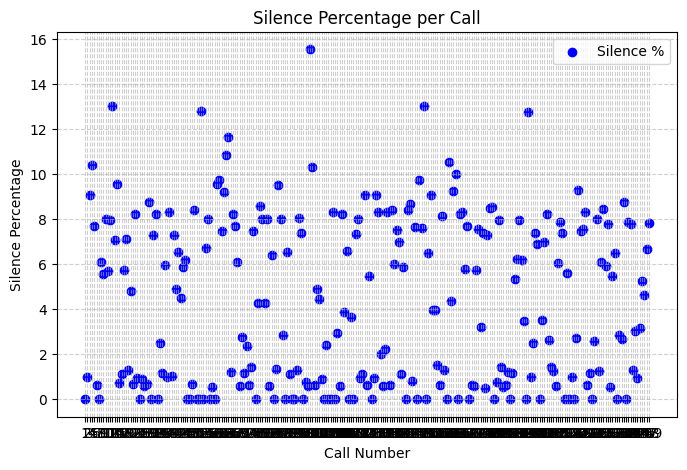

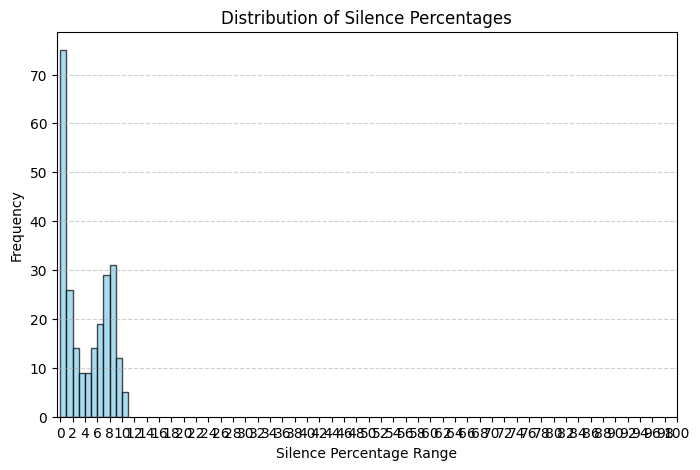

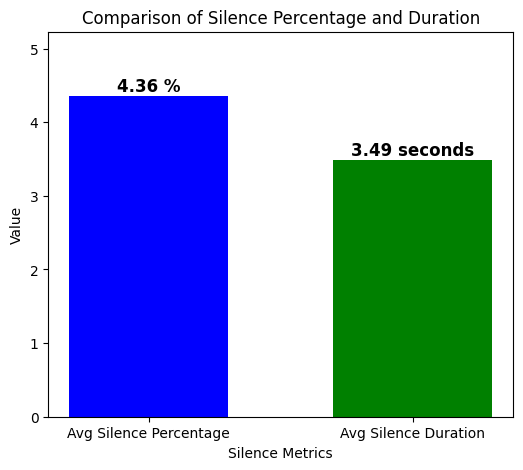

In [22]:
silence_metrics(file_paths)